In [1]:
%pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym -q
%pip install gym==0.23.0 -q
%pip install gym-anytrading -q
%pip install tensorflow-gpu -q
%pip install tensorflow -q
%pip install stable_baselines3 -q
%pip install finta -q

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.15.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==1.15.0
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-qih1l5_h/tensorflow-gpu_1877c68c45c5478c848c06a0783cb7bb/setup.py", line 37, in <module>
   

In [2]:
# Gym stuff
import importlib
import gym
#importlib.reload(gym)
import gym_anytrading
#import tf_slim as slim

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Using GME Data

https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [3]:
df = pd.read_csv('/kaggle/input/gmedata-tutorial/gmedata.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [6]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
250,2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
249,2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
248,2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
247,2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
246,2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


In [7]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


# Build ENV

In [8]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5) # frambe_bound = what portionn of data we want to include (our case we start from 5 step and go to 100 steps)
                                                        # Window size = how many sets of prices our bot takes. In our case 5 

In [9]:
env.prices

array([4.37, 4.23, 3.77, 4.19, 3.76, 3.81, 4.16, 4.17, 4.41, 4.22, 3.65,
       3.5 , 3.25, 2.85, 2.8 , 3.09, 3.27, 3.41, 3.89, 4.74, 5.95, 5.27,
       5.03, 4.88, 5.61, 4.78, 4.89, 4.7 , 4.77, 5.82, 5.64, 6.04, 5.73,
       6.05, 5.48, 5.39, 4.93, 4.87, 4.98, 4.76, 4.54, 4.21, 4.13, 4.22,
       4.58, 4.44, 4.43, 4.44, 4.18, 4.42, 4.69, 4.33, 4.06, 4.13, 4.18,
       4.44, 4.47, 4.14, 5.01, 4.96, 5.07, 4.37, 4.72, 4.69, 4.64, 4.76,
       4.95, 4.88, 4.87, 4.83, 4.41, 4.46, 4.35, 4.38, 4.34, 4.44, 4.29,
       4.24, 4.09, 4.26, 4.21, 4.34, 4.26, 4.08, 4.19, 4.17, 3.96, 3.85,
       4.01, 4.11, 4.11, 4.03, 4.01, 3.94, 4.06, 4.1 , 4.01, 4.15, 4.43,
       4.63])

info {'total_reward': 0.9700000000000015, 'total_profit': 0.8500181102629171, 'position': 1}


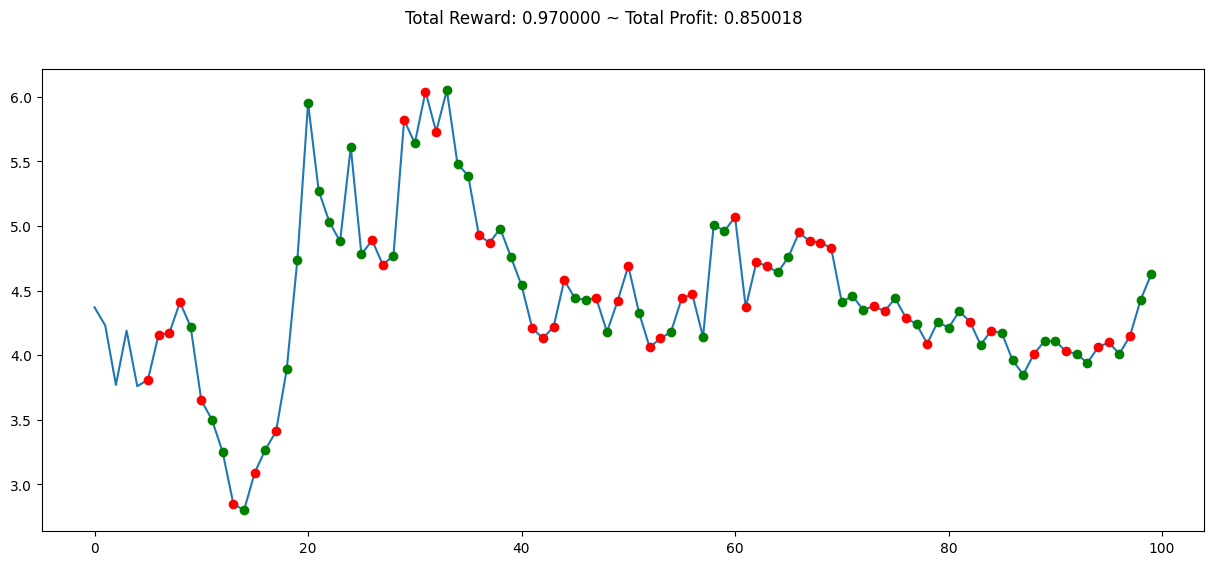

In [10]:
state = env.reset()
while True:
    action = env.action_space.sample() # Making a random action
    n_state, reward, done, info = env.step(action) # Applying random action to our ENV
    if done:
        print("info", info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all() # Enables us to render everything
plt.show()

# Addind indicators

In [11]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [12]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

## Calculating indicators

In [13]:
df['SMA']= TA.SMA(df,12)
df['RSI']= TA.RSI(df)
df['OBV']= TA.OBV(df)
df.fillna(0, inplace=True)

In [14]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,0.0,0.000000,0.0
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,0.0,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,0.0,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,0.0,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,0.0,29.351457,-9896574.0


# Create New Signals

In [15]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size # Calculating the start index (frame_bound[0] is equal to first element in window size from 5 to 100 (our case is 5))
    end = env.frame_bound[1] # Grabbing 100 from the range
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]  # Taking prices
    signal_features = env.df.loc[:, ['Low','Volume','SMA','RSI', 'OBV']].to_numpy()[start:end] # What Indicators we want to calculate
    return prices, signal_features

In [16]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals

env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,190)) # Frame bound is used for choosing training data

# Build env with Train

In [17]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [18]:
model = A2C('MlpPolicy', env, verbose=0) 
model.learn(total_timesteps=1_000_000) # Look for good 'explained_variance' If it equals 1 then we have already a really good result

# Evaluate

In [19]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(200,300))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 338.35, 'total_profit': 15.39101969590652, 'position': 0}


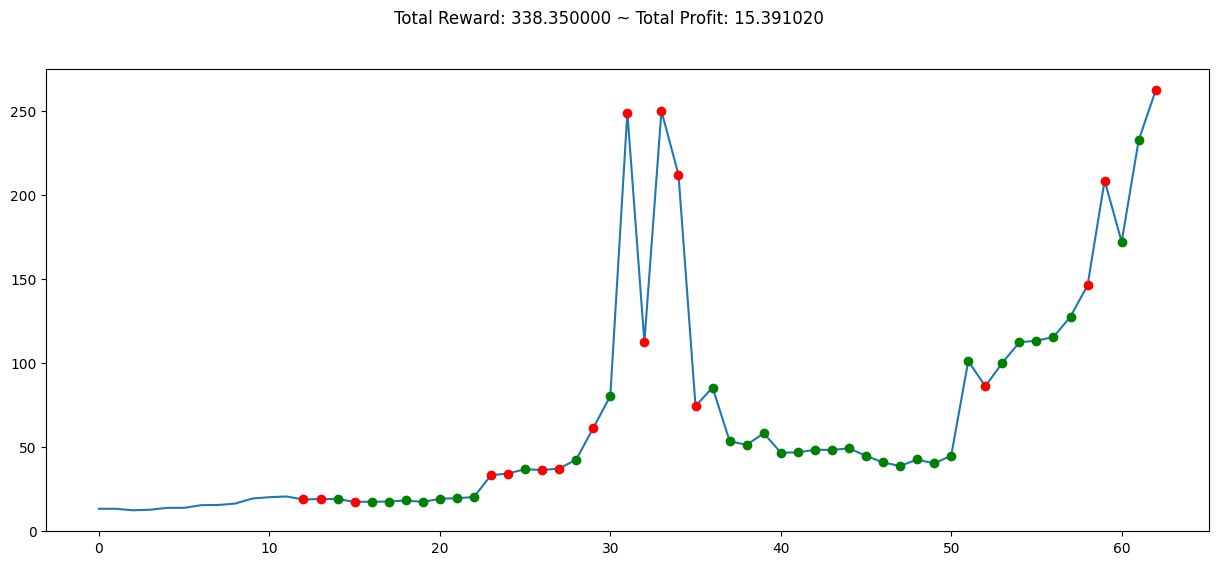

In [20]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()